In [1]:
# Last amended: 11th July, 2020
# My folder: /home/ashok/Documents/maps/
# VM: lubuntu_geo
# Ref:
# Data sources:
#      http://projects.datameet.org/Municipal_Spatial_Data/
#      http://projects.datameet.org/maps/
#      https://simplemaps.com/data/world-cities
# Kaggle Lessons
#      https://www.kaggle.com/learn/geospatial-analysis
# GeoPandas
#      https://geopandas.org/index.html
# COVID-19 Corona Virus India Dataset
#      https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset
#
# Moodle documentation ref:
#       http://203.122.28.230/moodle/course/view.php?id=10#section-3
#
#
#      Objectives:
#                 Learning to use geopandas
#                 Learning to use shapefiles and geojson files
#

In [2]:
# 1.0 Call libraries
# install geopandas using pip
#   conda install not successful
#   Difficult to install on Windows.
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# 1.1 Display outputs from all commands in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# 1.2 Directly read Bangalore GeoJSON file from its zip folder:
b_path = "zip:///home/ashok/Documents/maps/using_geopandas/municipal_spatial_data_master.zip"
bangalore_geojson = b_path + "!municipal_spatial_data_master/Bangalore/"
bangalore_data = gpd.read_file(bangalore_geojson+"BBMP.GeoJSON")
bangalore_data.head()

,OBJECTID,ASS_CONST_,ASS_CONST1,WARD_NO,WARD_NAME,POP_M,POP_F,POP_SC,POP_ST,POP_TOTAL,AREA_SQ_KM,LAT,LON,RESERVATIO,geometry
0,1,150,Yelahanka,2.0,Chowdeswari Ward,10402.0,9224.0,2630.0,286.0,19626.0,7.06,13.121709,77.580422,General,"MULTIPOLYGON (((77.59229 13.09720, 77.59094 13..."
1,2,150,Yelahanka,3.0,Atturu,13129.0,10891.0,2921.0,665.0,24020.0,10.15,13.102805,77.560038,General (Women),"MULTIPOLYGON (((77.56862 13.12705, 77.57064 13..."
2,3,150,Yelahanka,4.0,Yelahanka Satellite Town,13457.0,12325.0,3687.0,601.0,25782.0,4.90,13.090987,77.583925,Backward Category - A,"MULTIPOLYGON (((77.59094 13.09842, 77.59229 13..."
3,4,151,K.R. Puram,51.0,Vijnanapura,18118.0,16969.0,6454.0,228.0,35087.0,2.05,13.006063,77.669565,Scheduled Caste,"MULTIPOLYGON (((77.67683 13.01147, 77.67695 13..."
4,5,151,K.R. Puram,53.0,Basavanapura,11494.0,10518.0,4115.0,325.0,22012.0,6.28,13.016847,77.715456,General,"MULTIPOLYGON (((77.72899 13.02061, 77.72994 13..."


In [5]:
# 1.3 Similarly directly read India districts shapefile from its zip folder
d_path = "zip:///home/ashok/Documents/maps/using_geopandas/maps-master.zip"
d_shapefile_path = d_path + "!maps-master/Districts/Census_2011/"
districts_data = gpd.read_file(d_shapefile_path +"2011_Dist.shp")
districts_data.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [6]:
# 1.4 You can use many commands similar to pandas
type(bangalore_data)           # geopandas.geodataframe.GeoDataFrame
bangalore_data.shape           # (198,5)
districts_data.shape           # (641,6)
districts_data.describe()
districts_data.dtypes          # There is a new dtype: geometry

geopandas.geodataframe.GeoDataFrame

(198, 15)

(641, 6)

,ST_CEN_CD,DT_CEN_CD,censuscode
count,641.000000,641.000000,641.000000
mean,17.241810,16.154446,320.000000
std,9.958941,14.060011,185.185043
min,1.000000,1.000000,0.000000
25%,9.000000,6.000000,160.000000
50%,18.000000,13.000000,320.000000
75%,24.000000,22.000000,480.000000
max,99.000000,99.000000,640.000000


DISTRICT        object
ST_NM           object
ST_CEN_CD        int64
DT_CEN_CD        int64
censuscode       int64
geometry      geometry
dtype: object

In [9]:
# 2.0 Filter data from districts_data to that 
#      which pertains to Karnataka

karnataka_data = districts_data.loc[districts_data["ST_NM"] == "Karnataka", :]
karnataka_data.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
32,Bagalkot,Karnataka,29,2,556,"POLYGON ((76.24100 16.16531, 76.23538 16.13015..."
45,Bangalore Rural,Karnataka,29,29,583,"MULTIPOLYGON (((77.38701 13.50002, 77.40099 13..."
46,Bangalore,Karnataka,29,18,572,"POLYGON ((77.83549 12.86809, 77.83213 12.86372..."
65,Belgaum,Karnataka,29,1,555,"MULTIPOLYGON (((75.02647 16.93264, 75.02827 16..."
66,Bellary,Karnataka,29,11,565,"POLYGON ((77.15757 15.13706, 77.15887 15.12597..."


In [10]:
# 2.1 Create a shape file for karnataka state
#     (If folder 'states' already exists, an error is generated.
#      Delete first 'states' folder under 'using_geopandas' folder)

# Ref: https://geopandas.org/reference.html#geopandas.GeoDataFrame.to_file
#      https://geopandas.org/io.html#writing-spatial-data

os.makedirs("/home/ashok/Documents/maps/using_geopandas/states/shp")
karnataka_data.to_file("using_geopandas/states/shp/karnataka")

# 2.1.1 Shapefile is a minimum collection of 5-files
#       with data distributed in them and all of them
#       in one folder
os.listdir("/home/ashok/Documents/maps/using_geopandas/states/shp/karnataka")

['karnataka.shx',
 'karnataka.prj',
 'karnataka.dbf',
 'karnataka.cpg',
 'karnataka.shp']

In [11]:
# 2.2 Create a GeoJSON file to store mapdata
#     of Karnataka state

os.makedirs("/home/ashok/Documents/maps/using_geopandas/states/json")
karnataka_data.to_file(
                       "/home/ashok/Documents/maps/using_geopandas/states/json/karnataka.geojson",
                       driver='GeoJSON')


# 2.2.1 GeoJSON file is just one. IT stores
#       all information related to a map

os.listdir("/home/ashok/Documents/maps/using_geopandas/states/json")

['karnataka.geojson']

## Plotting maps
Let us now plot maps using geopandas. geopandas provides a high-level interface to the matplotlib library for making maps. Mapping shapes is as easy as using the plot() method on a GeoSeries or GeoDataFrame. See <a href=https://geopandas.org/mapping.html#mapping-tools>this link.</a>

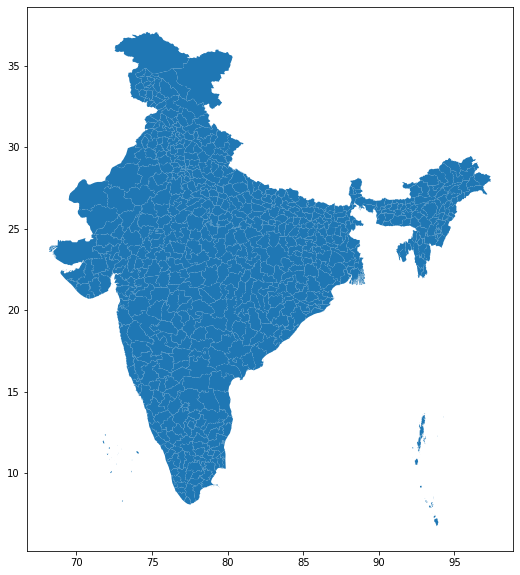

In [12]:
# 3.0 Let us start plotting.
#      Note the similarity to matplotlib commands
#        To plot it descartes package is needed
#          Install it as: pip install descartes

abc = districts_data.plot(figsize= (10,10))

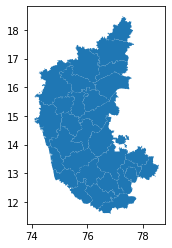

In [13]:
# 3.1 Read karnatka shape file and display the map
k_data = gpd.read_file("/home/ashok/Documents/maps/using_geopandas/states/shp/karnataka/karnataka.shp")
abc = k_data.plot()

In [14]:
# 3.2 Extract some columns from bangalore_data
#      just as we do in pandas

data = bangalore_data.loc[:, ["ASS_CONST1", "WARD_NAME", "geometry"]].copy()

In [15]:
# 3.3 How many lands of each type are there?

bangalore_data.ASS_CONST1.value_counts()

K.R. Puram              10
Bommana Halli            9
Rajarajeswari Nagar      9
Govindaraja Nagar        9
Dasarahalli              8
Padmanaba Nagar          8
B.T.M. Layout            8
Sarvagna Nagar           8
Hebbal                   8
Vijaya Nagar             8
Chickpet                 7
Shivaji Nagar            7
Jaya Nagar               7
Byatarayanapura          7
Bangalore South          7
Gandhi Nagar             7
Malleswaram              7
Chamarajpet              7
Rajaji Nagar             7
C.V. Ramannagar (SC)     7
Mahadevapura             7
Mahalakshmi Layout       7
Pulakeshi Nagar (SC)     7
Shanthi Nagar            7
Basavanagudi             6
Yeshwantpura             5
Yelahanka                4
Name: ASS_CONST1, dtype: int64

In [16]:
# 3.4 In Bangalore, select data pertaining to certain localities
locality_1 = data.loc[data.ASS_CONST1.isin(['Shivaji Nagar', 'Chamarajpet'])].copy()
locality_1.head()

,ASS_CONST1,WARD_NAME,geometry
81,Shivaji Nagar,Sampangiram Nagar,"MULTIPOLYGON (((77.59551 12.98637, 77.59684 12..."
82,Shivaji Nagar,Ramaswamy Palya,"MULTIPOLYGON (((77.60134 13.00864, 77.60147 13..."
83,Shivaji Nagar,Jayamahal,"MULTIPOLYGON (((77.59326 13.00567, 77.59329 13..."
84,Shivaji Nagar,Halsoor,"MULTIPOLYGON (((77.61827 12.98776, 77.61838 12..."
85,Shivaji Nagar,Bharathi Nagar,"MULTIPOLYGON (((77.61725 12.98863, 77.61724 12..."


In [17]:
# 3.5 Extract more data pertaining to certain other localities

locality_2 = data.loc[data.ASS_CONST1.isin(['Shanthi Nagar', 'Yelahanka'])].copy()
locality_2.head()

,ASS_CONST1,WARD_NAME,geometry
0,Yelahanka,Chowdeswari Ward,"MULTIPOLYGON (((77.59229 13.09720, 77.59094 13..."
1,Yelahanka,Atturu,"MULTIPOLYGON (((77.56862 13.12705, 77.57064 13..."
2,Yelahanka,Yelahanka Satellite Town,"MULTIPOLYGON (((77.59094 13.09842, 77.59229 13..."
88,Shanthi Nagar,Shantala Nagar,"MULTIPOLYGON (((77.59752 12.98094, 77.59755 12..."
89,Shanthi Nagar,Domlur,"MULTIPOLYGON (((77.64127 12.97028, 77.64137 12..."


In [18]:
# 3.6 Extract more data pertaining to certain other localities

locality_3 = data.loc[data.ASS_CONST1.isin(['Chickpet', 'Jaya Nagar'])].copy()
locality_3.head()

,ASS_CONST1,WARD_NAME,geometry
133,Chickpet,Sudham Nagara,"MULTIPOLYGON (((77.58700 12.96536, 77.58829 12..."
134,Chickpet,Dharmaraya Swamy Temple,"MULTIPOLYGON (((77.58677 12.96559, 77.58648 12..."
135,Chickpet,Sunkenahalli,"MULTIPOLYGON (((77.57375 12.94454, 77.57377 12..."
136,Chickpet,Vishveshwara Puram,"MULTIPOLYGON (((77.57362 12.95730, 77.57369 12..."
137,Chickpet,Siddapura,"MULTIPOLYGON (((77.59714 12.94404, 77.59725 12..."


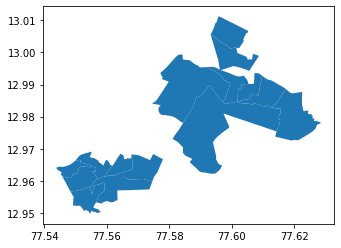

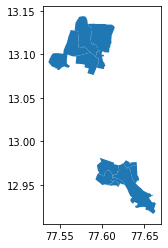

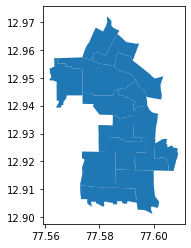

In [19]:
# 3.7 Plot all of these localities
#     Note that all are drawn in separate
#     axes.

abc = locality_1.plot()
abc=  locality_2.plot()
abc = locality_3.plot()

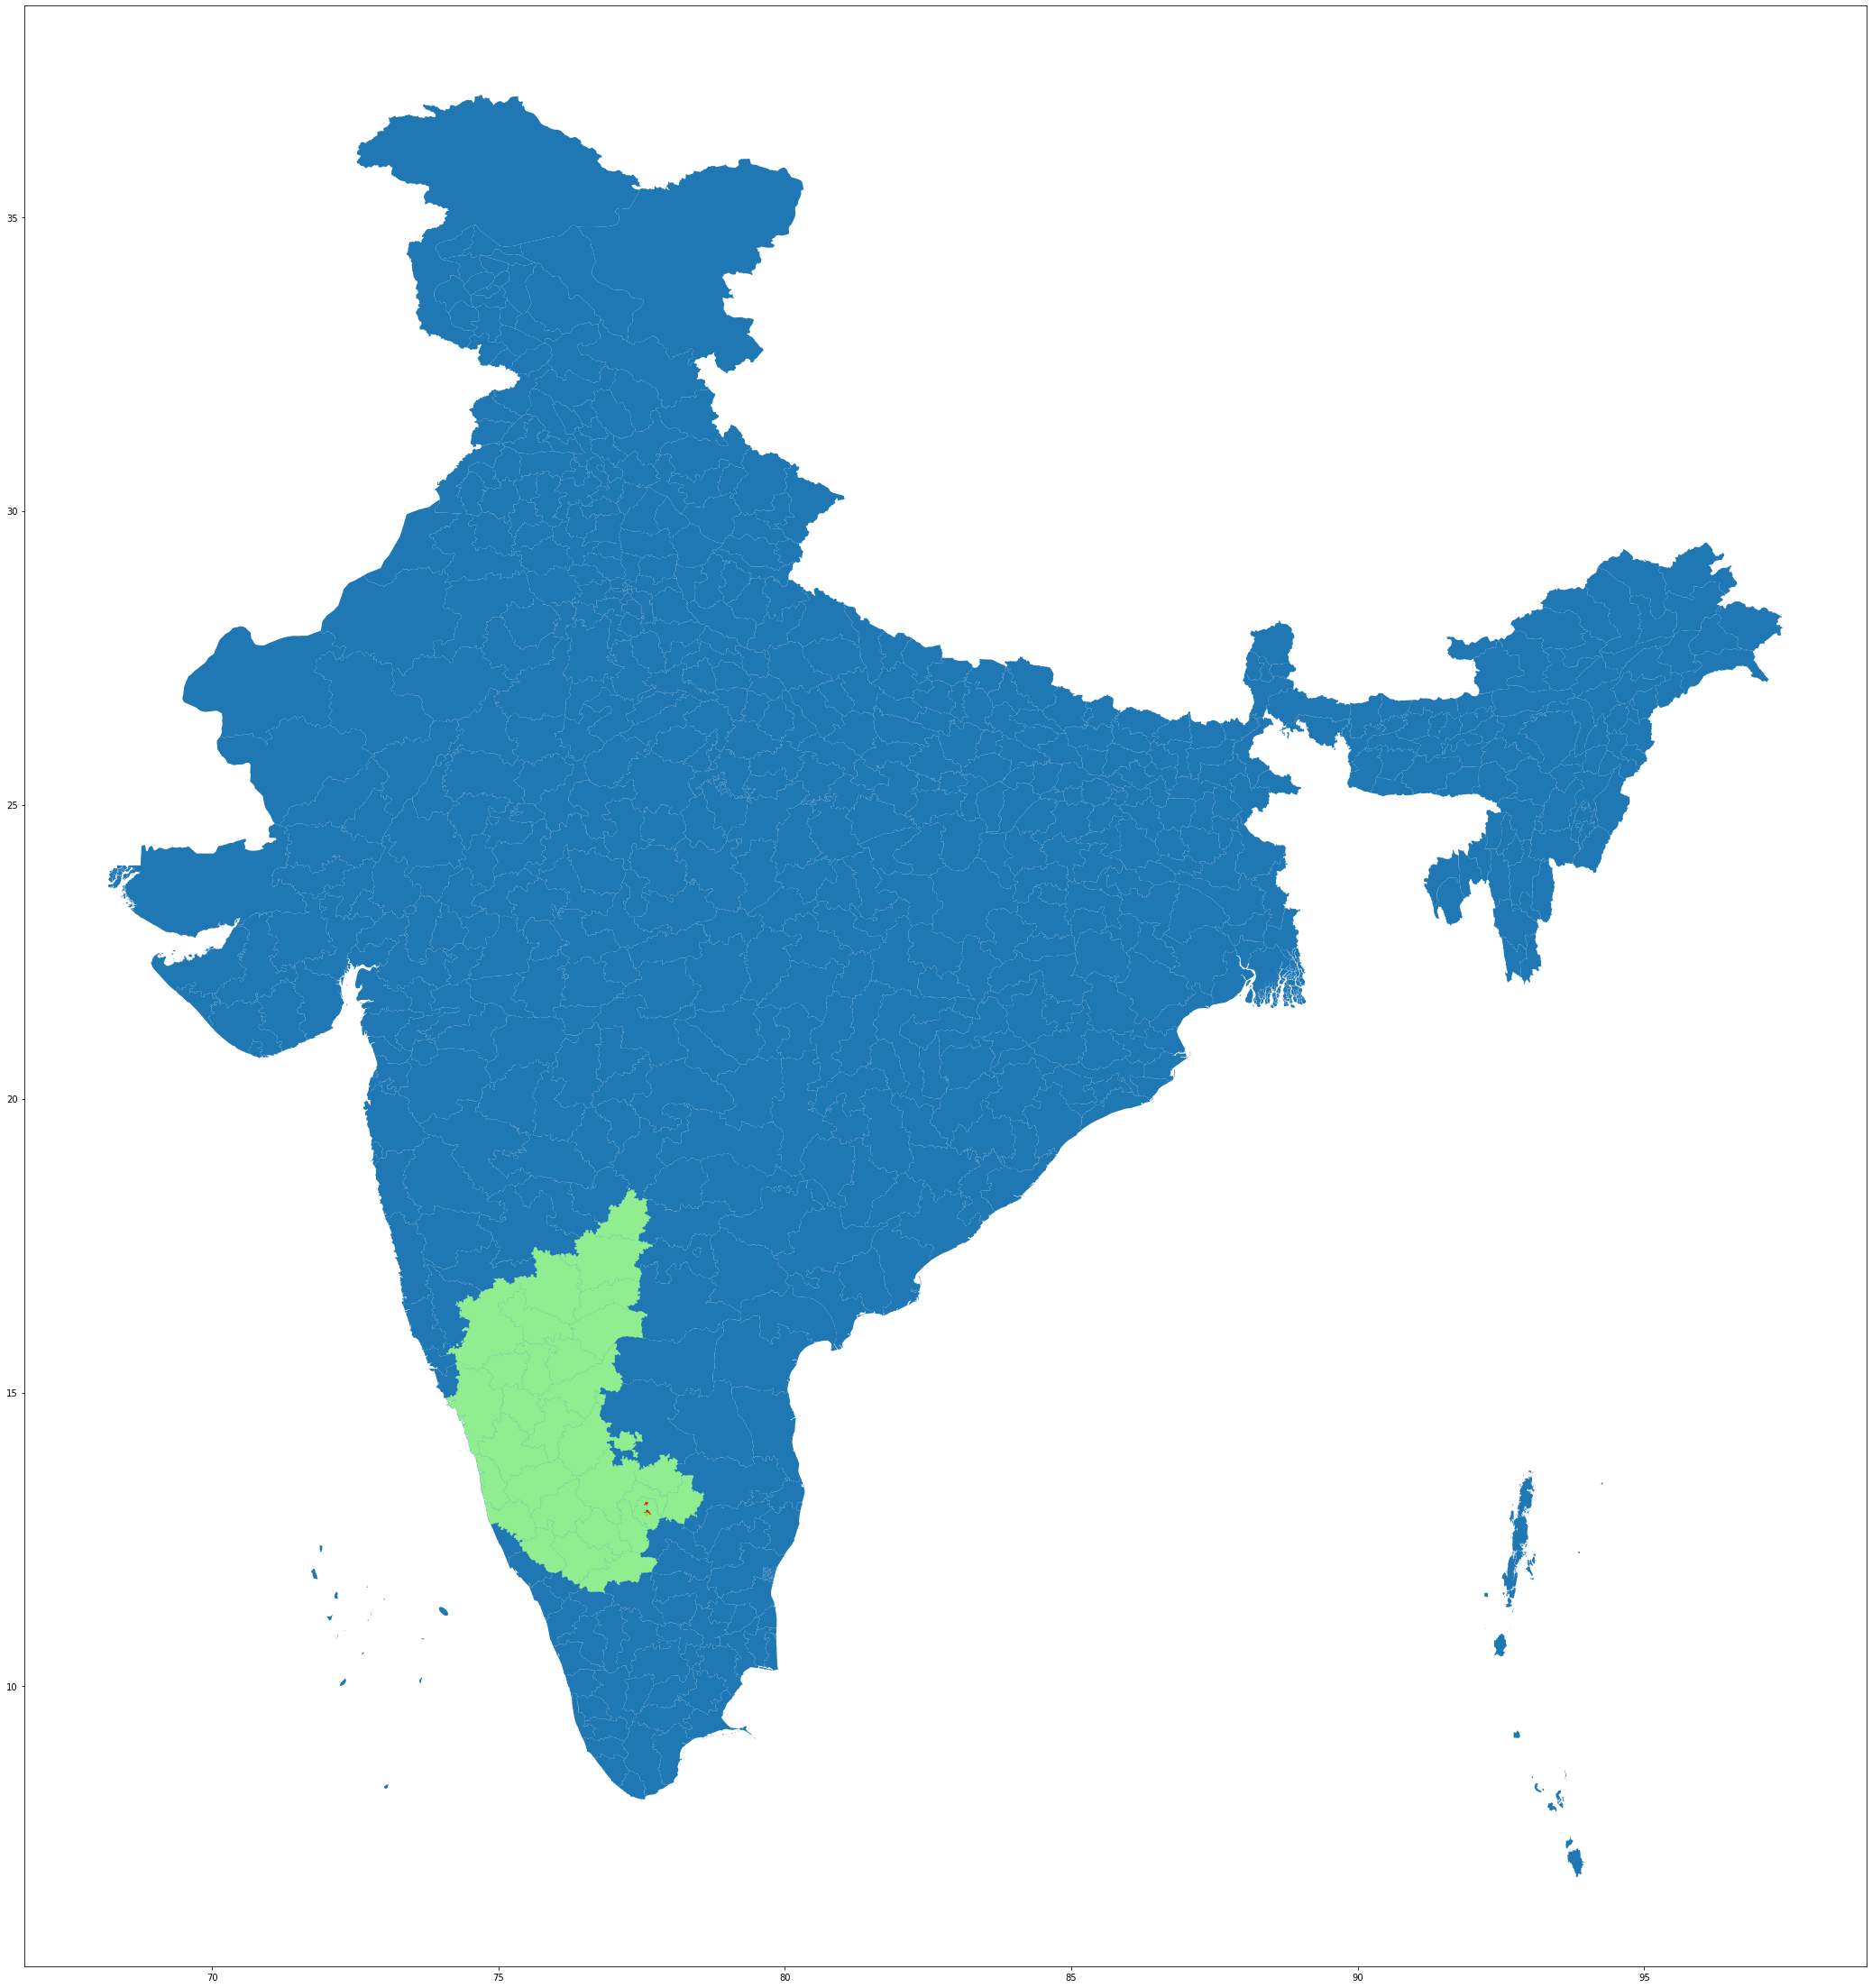

In [20]:
# 3.8 Let us superimpose all plots over plot of India
ax = districts_data.plot(figsize = (40,40))
abc = k_data.plot(color= 'lightgreen', ax= ax)
abc = locality_1.plot(color='black', ax = ax)
abc = locality_2.plot(color = 'red', ax = ax)
abc = locality_3.plot(color='orange', ax = ax)

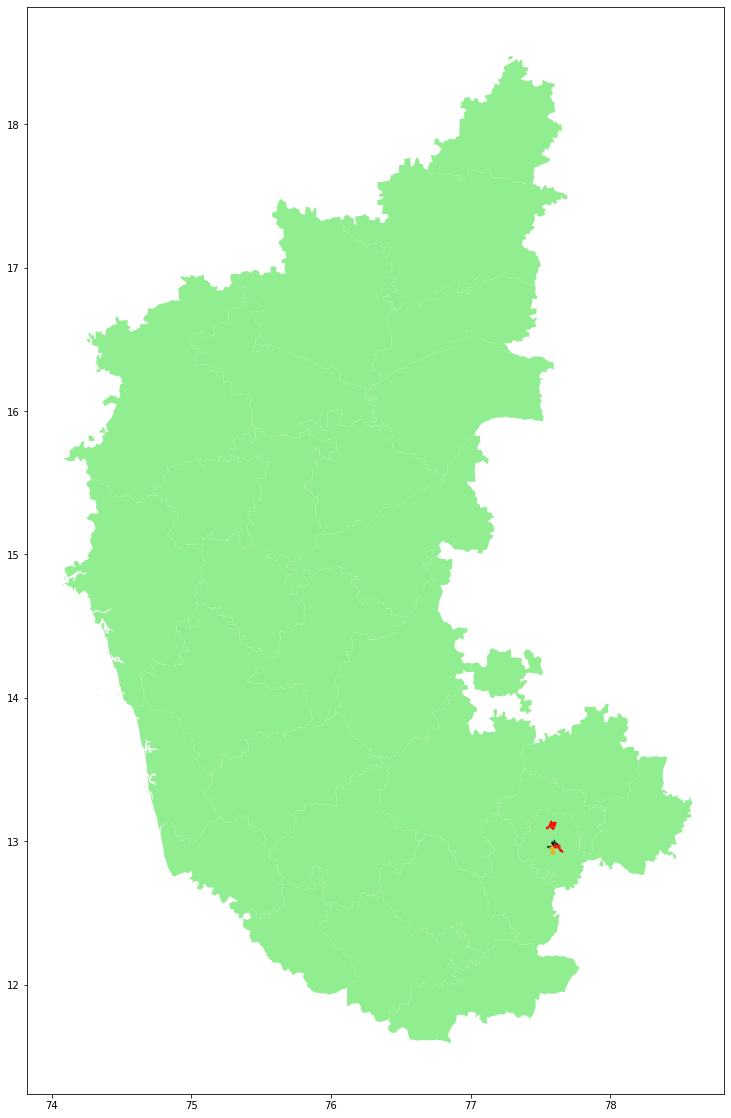

In [21]:
# 3.8 Let us superimpose all plots over plot of Karnatka
ax = k_data.plot(figsize = (20,20), color= 'lightgreen')
abc = locality_1.plot(color='black', ax = ax)
abc = locality_2.plot(color = 'red', ax = ax)
abc = locality_3.plot(color='orange', ax = ax)

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Anantapur,Andhra Pradesh,28,22,553,"POLYGON ((78.14427 14.94530, 78.14382 14.94009..."
1,Bangalore Rural,Karnataka,29,29,583,"MULTIPOLYGON (((77.38701 13.50002, 77.40099 13..."
2,Bangalore,Karnataka,29,18,572,"POLYGON ((77.83549 12.86809, 77.83213 12.86372..."
3,Bellary,Karnataka,29,11,565,"POLYGON ((77.15757 15.13706, 77.15887 15.12597..."
4,Chennai,Tamil Nadu,33,2,603,"POLYGON ((80.29769 13.12548, 80.29798 13.11914..."


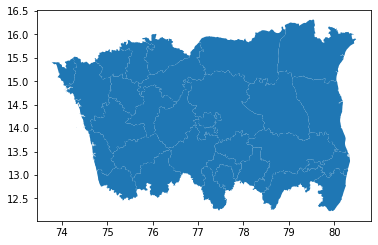

In [22]:
# 4.0 We create a bounding box and extract map data
#     only for that bounding box
#     Left corner of or BB is Goa
#     and right corner is Chennai
#     Goa:   Latitude: 15.2993, Longitude: 74.1240
#   Chennai: Latitude: 13.0827, Longitude: 80.2707

# 4.1 Defin bbox
bbox = (
        74.1240,15.2993, 80.2707, 13.0827
       )

# 4.2 Specify bbox while extracting data from file
gdf = gpd.read_file(
                    d_shapefile_path +"2011_Dist.shp",
                    bbox=bbox,
                   )
# 4.3
gdf.head()

# 4.4 And plot
abc = gdf.plot()

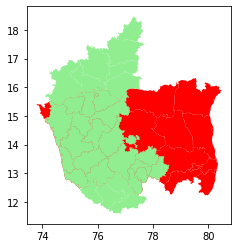

In [23]:
# 4.5 Next, plot the two extracted maps in one frame
ax = gdf.plot(color = 'red')
abc = k_data.plot(color= 'lightgreen', ax = ax)


## Choropleth maps
geopandas makes it easy to create Choropleth maps (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the column argument set to the column whose values you want used to assign colors. Refer <a href=https://geopandas.org/mapping.html#choropleth-maps>here</a>.

In [24]:
# 5.0 We read a csv file having State-wise covid data
#     It is read as a pandas DataFrame
covid = pd.read_csv("/home/ashok/Documents/maps/using_geopandas/state_level_latest.csv")

In [25]:
# 5.1 Just rename one column of this dataset to match
#     with column name of our one geometry dataset
covid.head(2)
covid = covid.rename(columns = {'State': 'ST_NM'})
covid.head(2)

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,769199,476600,21159,271340,09/07/2020 11:38:06,100,TT,147,46,15,NaN
1,Maharashtra,223724,123192,9448,91065,08/07/2020 20:28:27,19,MH,0,0,0,19 cases were marked as non-covid deaths in MH...


,ST_NM,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,769199,476600,21159,271340,09/07/2020 11:38:06,100,TT,147,46,15,NaN
1,Maharashtra,223724,123192,9448,91065,08/07/2020 20:28:27,19,MH,0,0,0,19 cases were marked as non-covid deaths in MH...


In [26]:
# 5.2 The way Jammu and Kashmir is spelled in
#     the two datasets is different
covid['ST_NM'].value_counts()
districts_data['ST_NM'].value_counts()


Punjab                                      1
Uttarakhand                                 1
Ladakh                                      1
Manipur                                     1
Andaman and Nicobar Islands                 1
Chhattisgarh                                1
Haryana                                     1
Tamil Nadu                                  1
Dadra and Nagar Haveli and Daman and Diu    1
West Bengal                                 1
Odisha                                      1
Lakshadweep                                 1
Mizoram                                     1
Puducherry                                  1
Total                                       1
Arunachal Pradesh                           1
Jharkhand                                   1
Kerala                                      1
Nagaland                                    1
Karnataka                                   1
Telangana                                   1
Jammu and Kashmir                 

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Jammu & Kashmir             23
Andhra Pradesh              23
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunanchal Pradesh          16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
NCT of Delhi                 9
Manipur                      9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [27]:
# 5.3 Let us make it spellings uniform
covid.loc[covid['ST_NM'] == 'Jammu and Kashmir', 'ST_NM'] = 'Jammu & Kashmir'
# 5.3.1 Check
covid.loc[covid['ST_NM'] == 'Jammu & Kashmir', :]

,ST_NM,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
16,Jammu & Kashmir,9261,5567,149,3545,08/07/2020 21:38:35,0,JK,0,0,0,NaN


In [28]:
# 5.4 Here is our districts/states data with geomtery
districts_data.head(2)

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."


In [29]:
# 5.5 Merge GeoDataFrame with pandas DataFrame
districts_data.shape
districts_data = districts_data.merge(covid, on='ST_NM')
districts_data.head(2)
districts_data.shape   # (587, 17) Data for some states/UTs may not be available


(641, 6)

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",22259,11101,264,10894,08/07/2020 14:18:28,0,AP,0,0,0,Total includes patients from other states and ...
1,Anantapur,Andhra Pradesh,28,22,553,"POLYGON ((78.14427 14.94530, 78.14382 14.94009...",22259,11101,264,10894,08/07/2020 14:18:28,0,AP,0,0,0,Total includes patients from other states and ...


(610, 17)

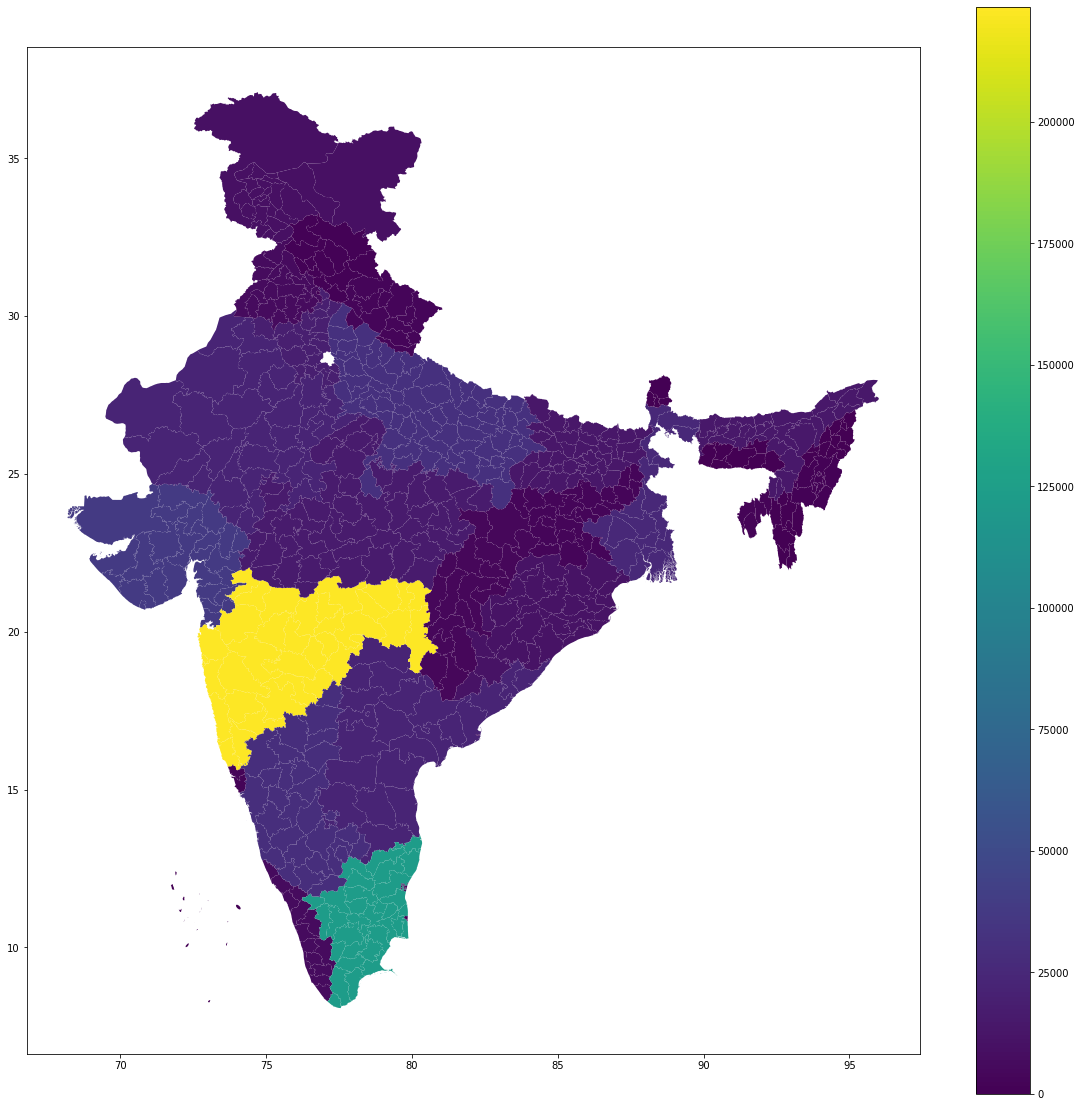

In [30]:
# 5.6 Plot the choropleth map
# https://geopandas.org/mapping.html#choropleth-maps
fig, ax = plt.subplots(1, 1, figsize = (20,20))
abc = districts_data.plot(
                          column = 'Confirmed',
                          ax =ax,
                          legend = True
                          )

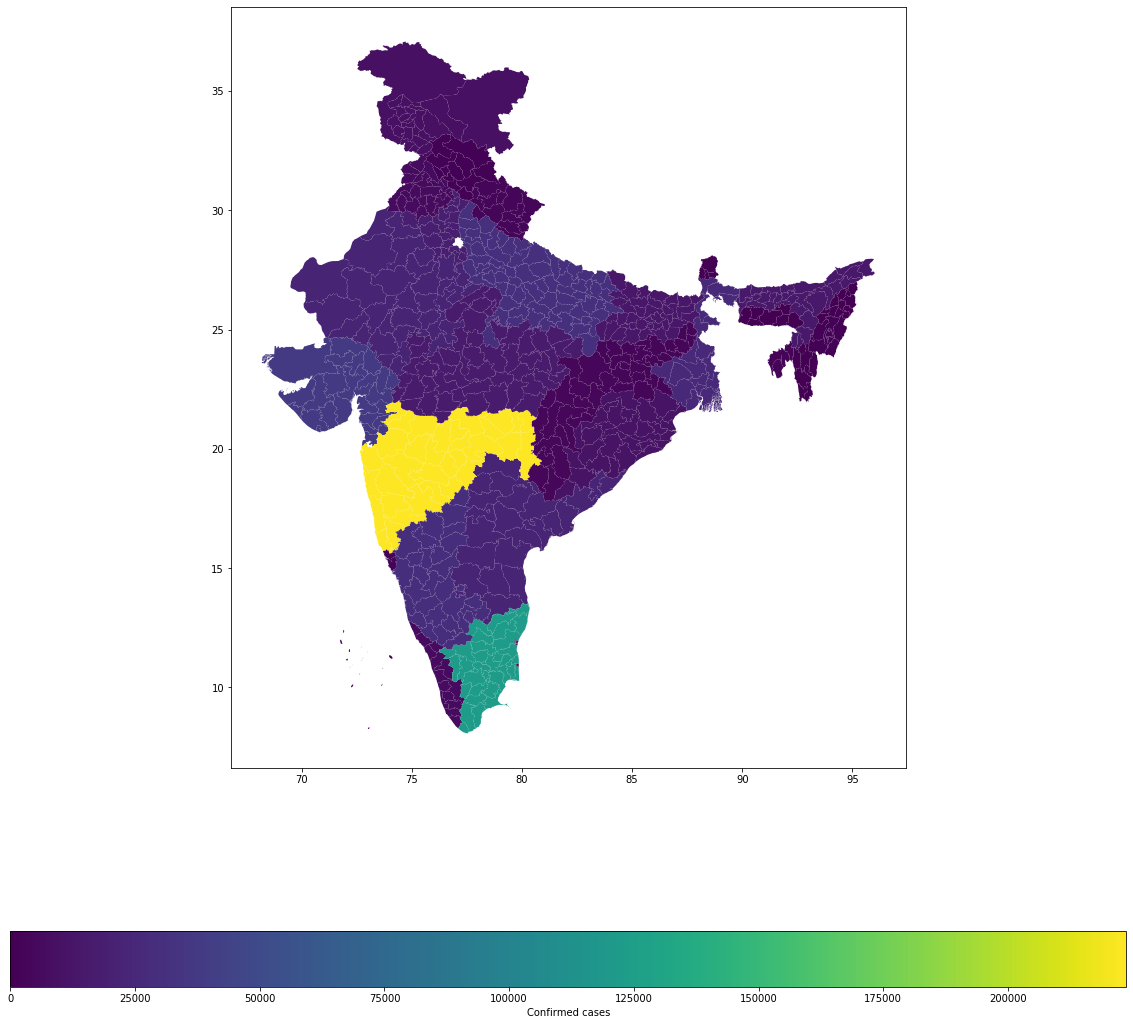

In [31]:
# 5.7 Plot horizontal colorbar with title
fig, ax = plt.subplots(1, 1, figsize = (20,20))
abc = districts_data.plot(
                          column = 'Confirmed',
                          ax =ax,
                          legend = True,
                          legend_kwds={
                                         'label': "Confirmed cases",
                                         'orientation': "horizontal"
                                      }
                          )

## Creating a GeoDataFrame from a DataFrame with coordinates
We will use a dataset of cities available <a href=https://simplemaps.com/data/world-cities>here</a>. We will download the dataset in a zipped file and directly use zipped file. We will create a GeoDataFrame when starting from a regular DataFrame that has coordinates in two columns. Naturally, the geometry created will be 'Point' geometry as the dataset holds no information regarding lines and polygons.  


In [32]:
# 6.0 Path to our World Cities data within zip file
w_path = "zip:///home/ashok/Documents/maps/using_geopandas/worldcities_basic.zip"
w_csv = w_path + "!worldcities.csv"
w_data = gpd.read_file(w_csv)

In [33]:
w_data.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,geometry
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000,1392685764,None
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,,19354922.0,1840034016,None
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000,1484247881,None
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000,1356226629,None
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000,1076532519,None


In [34]:
# 6.1 Read once again, afresh districts shape file
districts_data = gpd.read_file(d_shapefile_path +"2011_Dist.shp")
districts_data.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [35]:
# 6.2 Add to this dataframe a geometery column derived from
#     latitude/longitude columns

gdf = gpd.GeoDataFrame(
                        w_data,          
                        geometry=gpd.points_from_xy(w_data.lng,w_data.lat)   # New column being created
                       )

# 6.1.1
gdf.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,geometry
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000,1392685764,POINT (139.75140 35.68500)
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,,19354922.0,1840034016,POINT (-73.92490 40.69430)
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000,1484247881,POINT (-99.13100 19.44240)
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000,1356226629,POINT (72.85700 19.01700)
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000,1076532519,POINT (-46.62500 -23.55870)


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,geometry
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000,1356226629,POINT (72.85700 19.01700)
5,Delhi,Delhi,28.6700,77.2300,India,IN,IND,Delhi,admin,15926000,1356872604,POINT (77.23000 28.67000)
7,Kolkata,Kolkata,22.4950,88.3247,India,IN,IND,West Bengal,admin,14787000,1356060520,POINT (88.32470 22.49500)
34,Chennai,Chennai,13.0900,80.2800,India,IN,IND,Tamil Nādu,admin,7163000,1356374944,POINT (80.28000 13.09000)
36,Bengalūru,Bengaluru,12.9700,77.5600,India,IN,IND,Karnātaka,admin,6787000,1356410365,POINT (77.56000 12.97000)


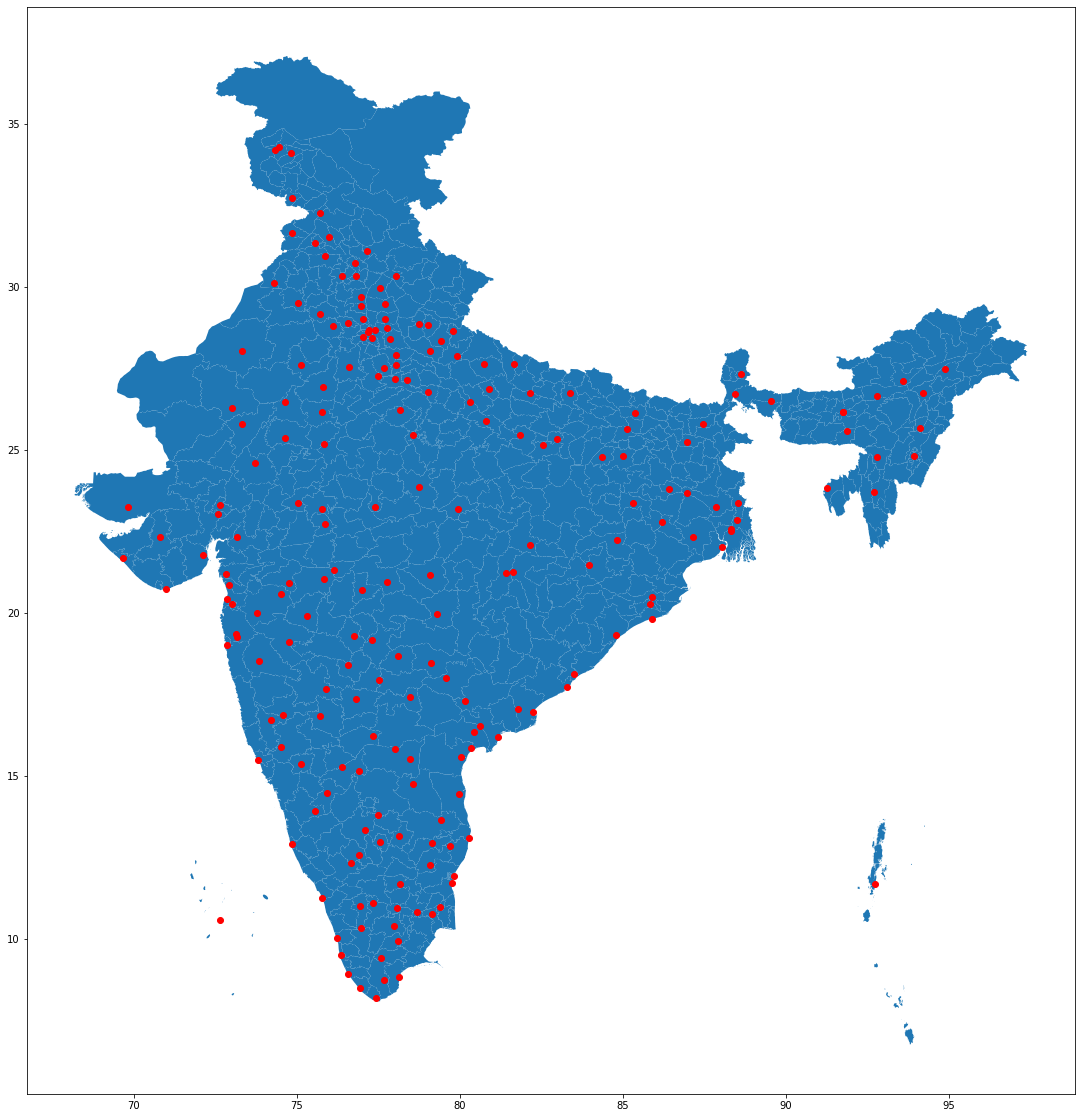

In [36]:
# 6.3 While plotting, we will restrict
#     ourselves to India

# 6.3.1 Filter data
gdf = gdf[gdf["country"] == 'India']
gdf.head()

# 6.3.2 Plot now districts map, overlaid
#       with location of cities from cities
#       database

ax = districts_data.plot(figsize=(20,20))
gdf.plot(color = "red", ax = ax)

In [ ]:
################### I am done ################